In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data=pd.read_csv('final_cccf.csv')
data.head()
data.shape

(11275, 5)

In [7]:
data.dropna(inplace=True)
data.shape
data

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0
5,aurinegro,aurinegro,2202.0,aurinegro,2628.0
6,retrograd,retrograd,2262.0,retrograd,2628.0
7,chris19,anudeep2011,2023.0,anudeep2011,2565.0
...,...,...,...,...,...
10269,Prince_Raj,daud43,624.0,praj0609,580.0
10270,Notanonymous,bhardwajarpit1998,1182.0,arpit_987,569.0
10272,yash1399,yash1399,979.0,yash1399,518.0
10274,hihihihipathak,praveenpathak,1581.0,hihihihipathak,460.0


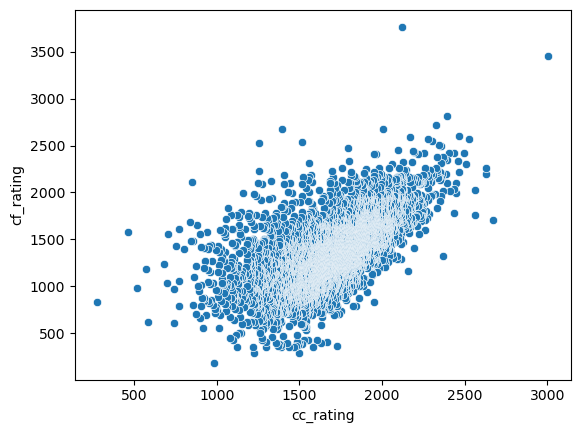

In [31]:
x=data['cc_rating']
y=data['cf_rating']
sns.scatterplot(x=x,y=y)
x_original=x.copy()

In [26]:

x_mean=np.mean(x)
x_std=np.std(x)
x=(x-x_mean)/x_std
w=0
b=0
alpha=0.0001
rep=500000
x=np.array(x)
y=np.array(y)
m=len(x)
def prediction(x,w,b):
    return w*x+b
def gradient(y_pred,y,x,m):
    dw=(2/m)*np.dot((y_pred-y),x)
    db=(2/m)*sum(y_pred-y)
    return dw,db

for i in range(rep):
    y_pred=prediction(x,w,b)
    dw,db=gradient(y_pred,y,x,m)
    w=w-alpha*dw
    b=b-alpha*db
y_pred=x*w+b
y_pred

array([2467.87783605, 2190.13610949, 2152.71581699, ...,  398.11987972,
        349.88928049,  197.71342432])

<Axes: xlabel='cc_rating', ylabel='cf_rating'>

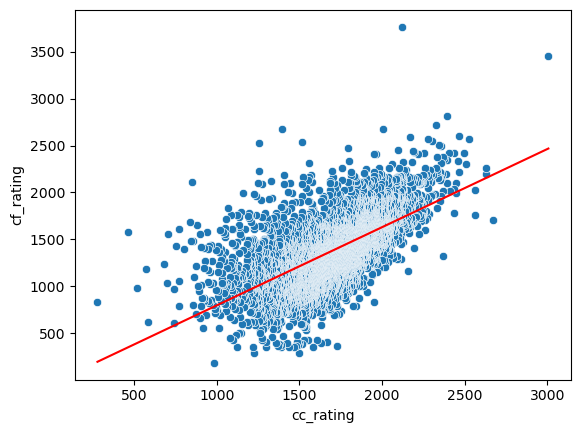

In [32]:
sns.scatterplot(x=x,y=y)
sns.lineplot(x=x_original,y=y_pred,color='red')